In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

подключаем библиотеки

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train.csv


In [ ]:
df = pd.read_csv('Train.csv')  #загружаем файл

смотрим на типы признаков и в каких признаках есть пропуски

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          70000 non-null  int64  
 1   date        70000 non-null  object 
 2   street_id   70000 non-null  int64  
 3   build_tech  49121 non-null  float64
 4   floor       70000 non-null  int64  
 5   area        70000 non-null  int64  
 6   rooms       70000 non-null  int64  
 7   balcon      70000 non-null  int64  
 8   metro_dist  66550 non-null  float64
 9   g_lift      48924 non-null  float64
 10  n_photos    70000 non-null  int64  
 11  kw1         70000 non-null  int64  
 12  kw2         70000 non-null  int64  
 13  kw3         70000 non-null  int64  
 14  kw4         70000 non-null  int64  
 15  kw5         70000 non-null  int64  
 16  kw6         70000 non-null  int64  
 17  kw7         70000 non-null  int64  
 18  kw8         70000 non-null  int64  
 19  kw9         70000 non-nul

смотрим статистику датасета

In [ ]:
df.describe()

,id,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
count,70000.000000,70000.000000,49121.000000,70000.000000,70000.000000,70000.000000,70000.000000,66550.000000,48924.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.00000,70000.000000,7.000000e+04
mean,49999.303386,334.282100,0.529407,5.273186,52.241786,2.117843,0.396114,22.163561,0.498917,2.470386,...,0.004186,0.001486,0.000943,0.008129,0.007700,0.002286,0.000329,0.00120,0.000200,5.137179e+06
std,28871.076235,194.147385,0.573750,3.903420,17.775330,0.829558,0.547655,8.272839,0.500004,1.942283,...,0.064562,0.038517,0.030692,0.089792,0.087412,0.047755,0.018124,0.03462,0.014141,4.196022e+06
min,0.000000,0.000000,0.000000,1.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,4.890000e+05
25%,25005.500000,166.000000,0.000000,2.000000,40.000000,1.000000,0.000000,15.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.651000e+06
50%,49938.500000,334.000000,0.000000,4.000000,52.000000,2.000000,0.000000,25.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,4.090000e+06
75%,75003.500000,502.000000,1.000000,7.000000,60.000000,3.000000,1.000000,30.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,6.255000e+06
max,99999.000000,671.000000,2.000000,25.000000,217.000000,6.000000,2.000000,30.000000,1.000000,11.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,8.054800e+07


построим распределение целевого признака (price)

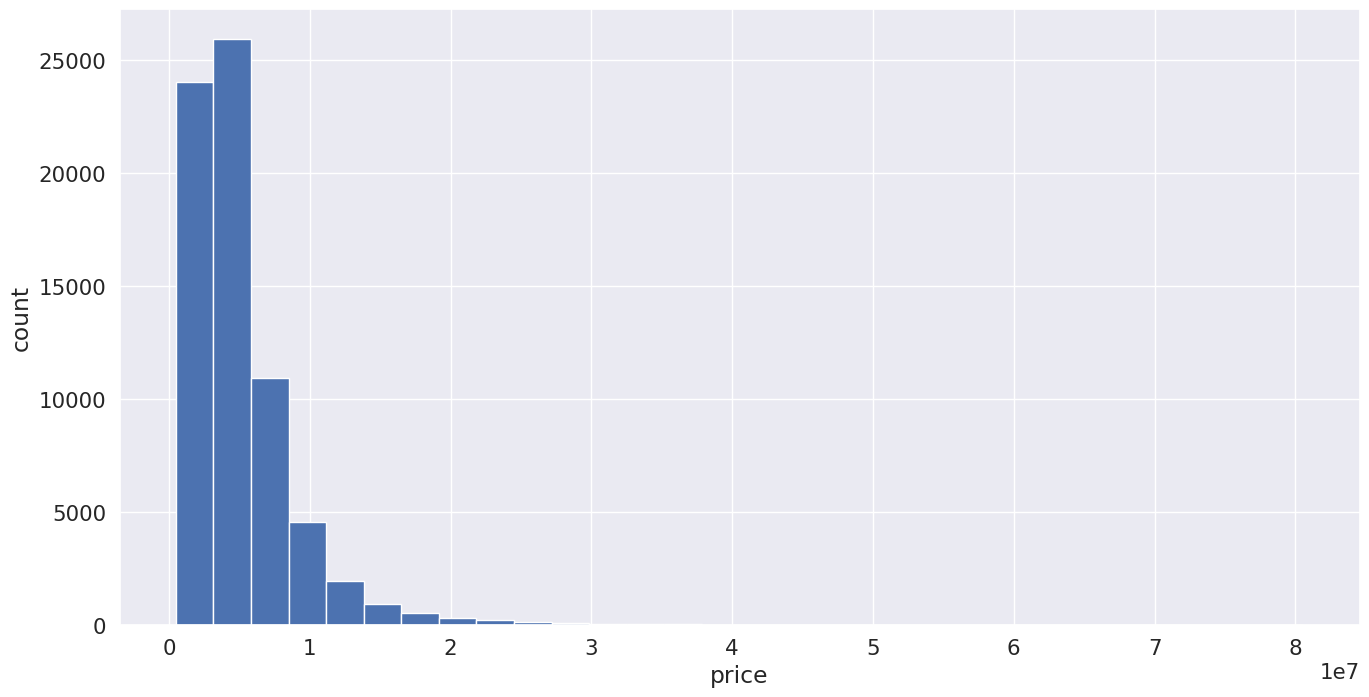

In [ ]:
plt.figure(figsize = (16, 8))
plt.hist(df['price'], bins=30)
plt.ylabel('count')
plt.xlabel('price')
plt.show()

In [ ]:
np.linspace(0, 0.000005, 10)

array([0.00000000e+00, 5.55555556e-07, 1.11111111e-06, 1.66666667e-06,
       2.22222222e-06, 2.77777778e-06, 3.33333333e-06, 3.88888889e-06,
       4.44444444e-06, 5.00000000e-06])

<ipython-input-47-c51037962c96>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=50)


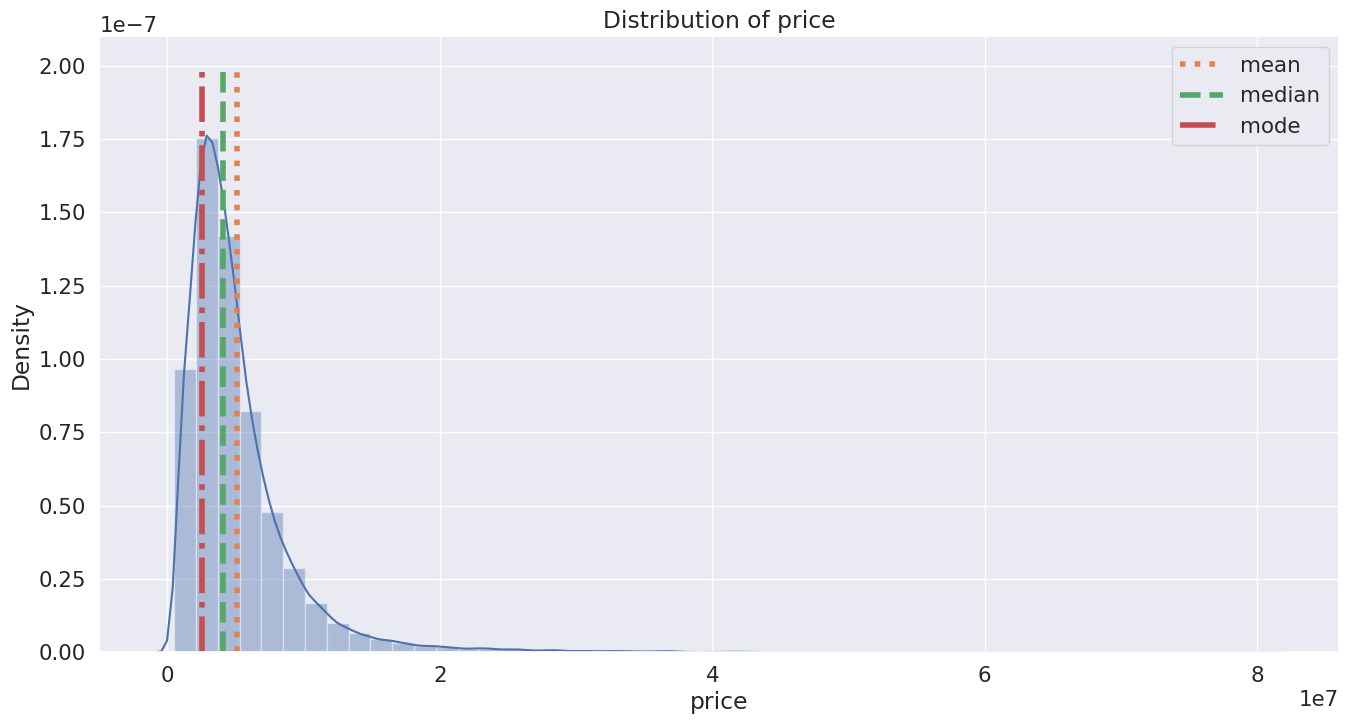

In [ ]:
target_mean = round(df['price'].mean(), 2) #находим среднее значение
target_median = df['price'].median() #находим медиану

target_bins = df['price'] // 500000 * 500000 #разбиваем цены на группы с разницей в 500 тысяч, чтобы более адекватно найти моду
target_mode = target_bins.mode()[0] #находим моду

plt.figure(figsize = (16, 8))

sns.distplot(df['price'], bins=50)

#строим медиану, моду, среднее
y = [0, 2e-7]
plt.plot([target_mean] * 2, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 2, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 2, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of price')
plt.legend()
plt.show()

Функция value_counts () используется для получения Series, содержащего уникальные значения. Она вернет результат, отсортированный в порядке убывания, так что первый элемент в коллекции будет самым встречаемым.

In [ ]:
target_bins.value_counts()

2500000     6441
3000000     6147
3500000     5794
2000000     5705
4000000     5343
            ... 
70500000       1
56500000       1
50000000       1
76000000       1
51000000       1
Name: price, Length: 112, dtype: int64

In [ ]:
target_bins.value_counts()[:30]

2500000     6441
3000000     6147
3500000     5794
2000000     5705
4000000     5343
1000000     4990
4500000     4496
1500000     4473
5000000     4053
5500000     3157
6000000     2767
6500000     2243
7000000     1964
7500000     1602
8000000     1364
8500000     1186
9000000     1007
9500000      884
10000000     678
10500000     627
11000000     515
11500000     486
500000       417
12000000     358
12500000     316
13000000     296
13500000     243
14000000     204
14500000     190
15000000     168
Name: price, dtype: int64

посмотрим более подробно на основное скопление

<ipython-input-50-29aa2c35ee0e>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['price'] < 8e6,'price'], bins=50)


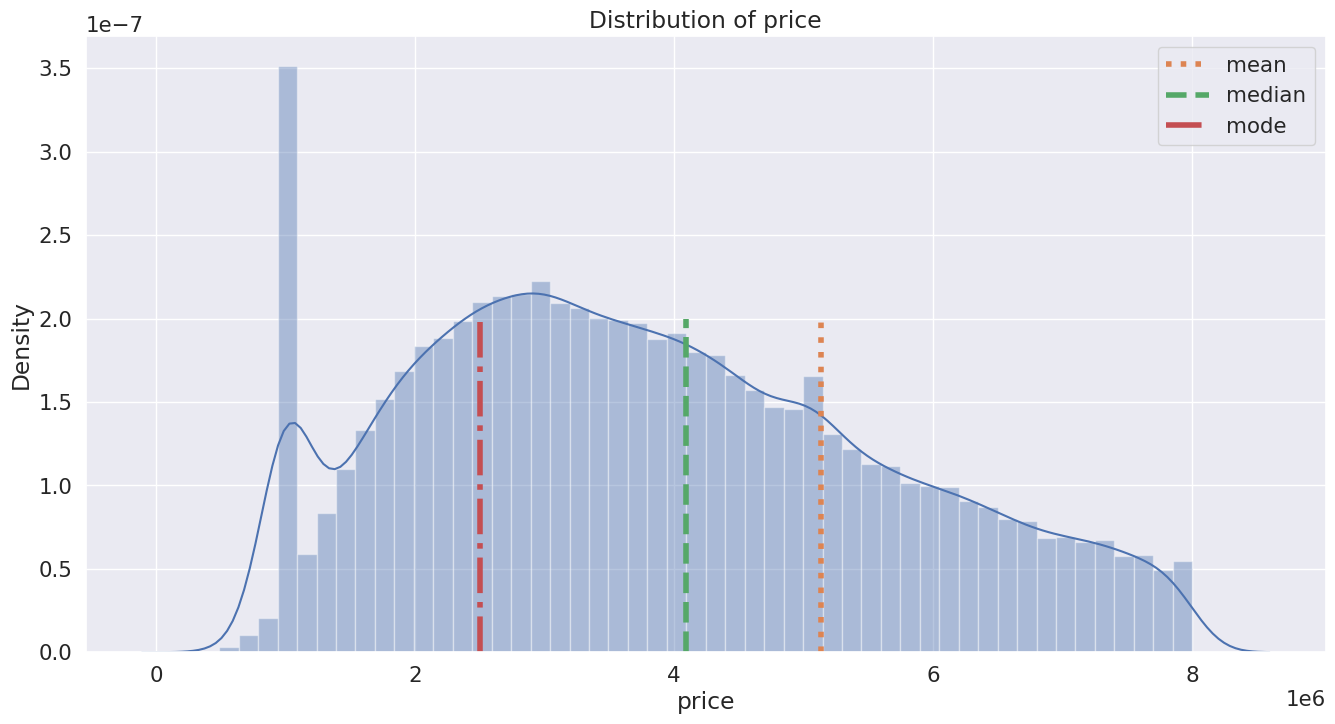

In [ ]:
target_mean = round(df['price'].mean(), 2)
target_median = df['price'].median()

target_bins = df['price'] // 500000 * 500000
target_mode = target_bins.mode()[0]

plt.figure(figsize = (16, 8))

sns.distplot(df.loc[df['price'] < 8e6,'price'], bins=50)

y = [0, 2e-7]
plt.plot([target_mean] * 2, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 2, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 2, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of price')
plt.legend()
plt.show()

по графику предположительно есть выброс, пробуем найти его

In [ ]:
df['price'].mode()

0    1000000
Name: price, dtype: int64

смотрим количество цен равных 1 миллиону

In [ ]:
df[df['price'] == 1e6].shape[0]

2783

Похоже на выброс, т.к. неестественное количество квартир по этой цене

In [ ]:
df = df.drop(df[df['price'] == 1e6].index) #выбрасываем объекты с ценой 1 миллион
df.reset_index(drop= True , inplace= True ) #обновляем индексы

еще раз смотрим более подробно на основное скопление

<ipython-input-54-c5746dbebc69>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['price'] < 8e6,'price'], bins=50)


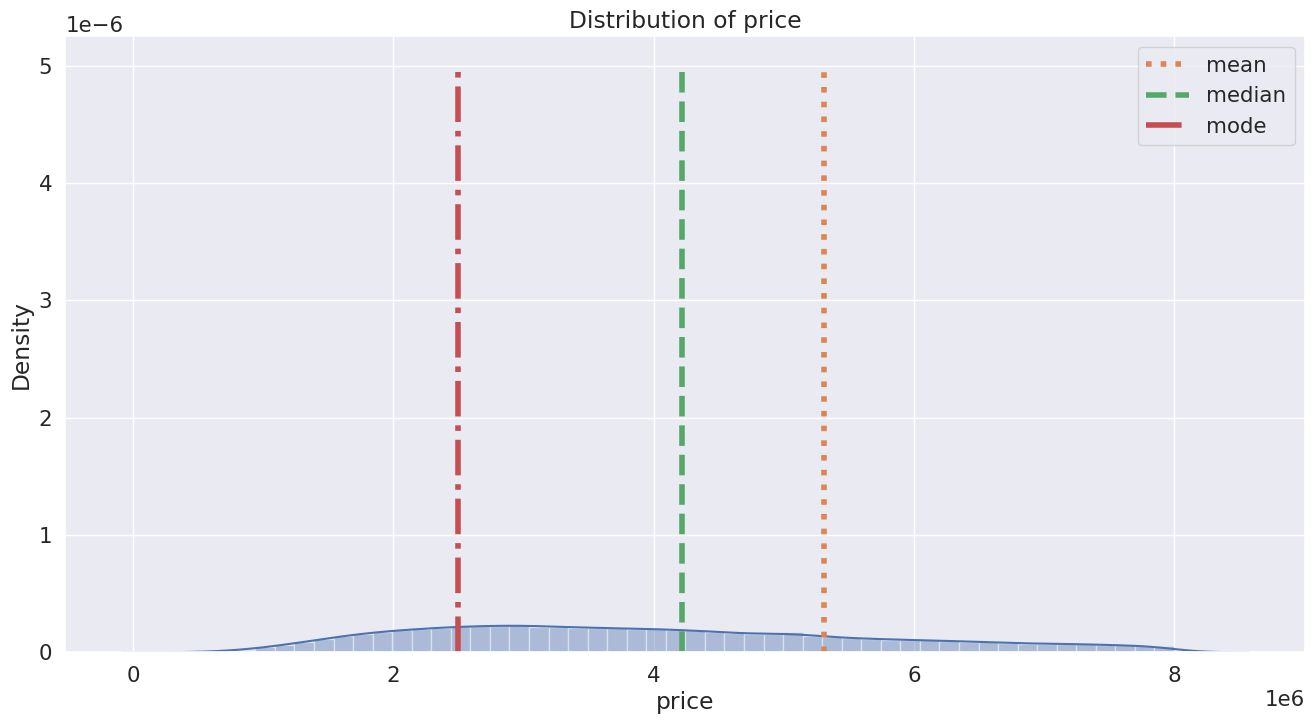

In [ ]:
target_mean = round(df['price'].mean(), 2)
target_median = df['price'].median()

target_bins = df['price'] // 500000 * 500000
target_mode = target_bins.mode()[0]

plt.figure(figsize = (16, 8))

sns.distplot(df.loc[df['price'] < 8e6,'price'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of price')
plt.legend()
plt.show()

смотрим на распределение признака date

In [ ]:
df['date'].value_counts()

2012-1     3834
2011-10    3812
2011-4     3809
2012-2     3790
2012-12    3782
2011-11    3778
2011-2     3767
2011-6     3756
2012-10    3740
2011-1     3738
2011-3     3735
2011-9     3728
2011-5     3719
2011-8     3686
2012-11    3686
2011-12    3675
2011-7     3668
2012-3     3514
Name: date, dtype: int64

смотрим на распределение признака build_tech

In [ ]:
df['build_tech'].value_counts()

0.0    24074
1.0    21194
2.0     1897
Name: build_tech, dtype: int64

берем количественные признаки и строим для них распределение

array([[<Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'balcon'}>,
        <Axes: title={'center': 'metro_dist'}>,
        <Axes: title={'center': 'g_lift'}>],
       [<Axes: title={'center': 'n_photos'}>, <Axes: >, <Axes: >]],
      dtype=object)

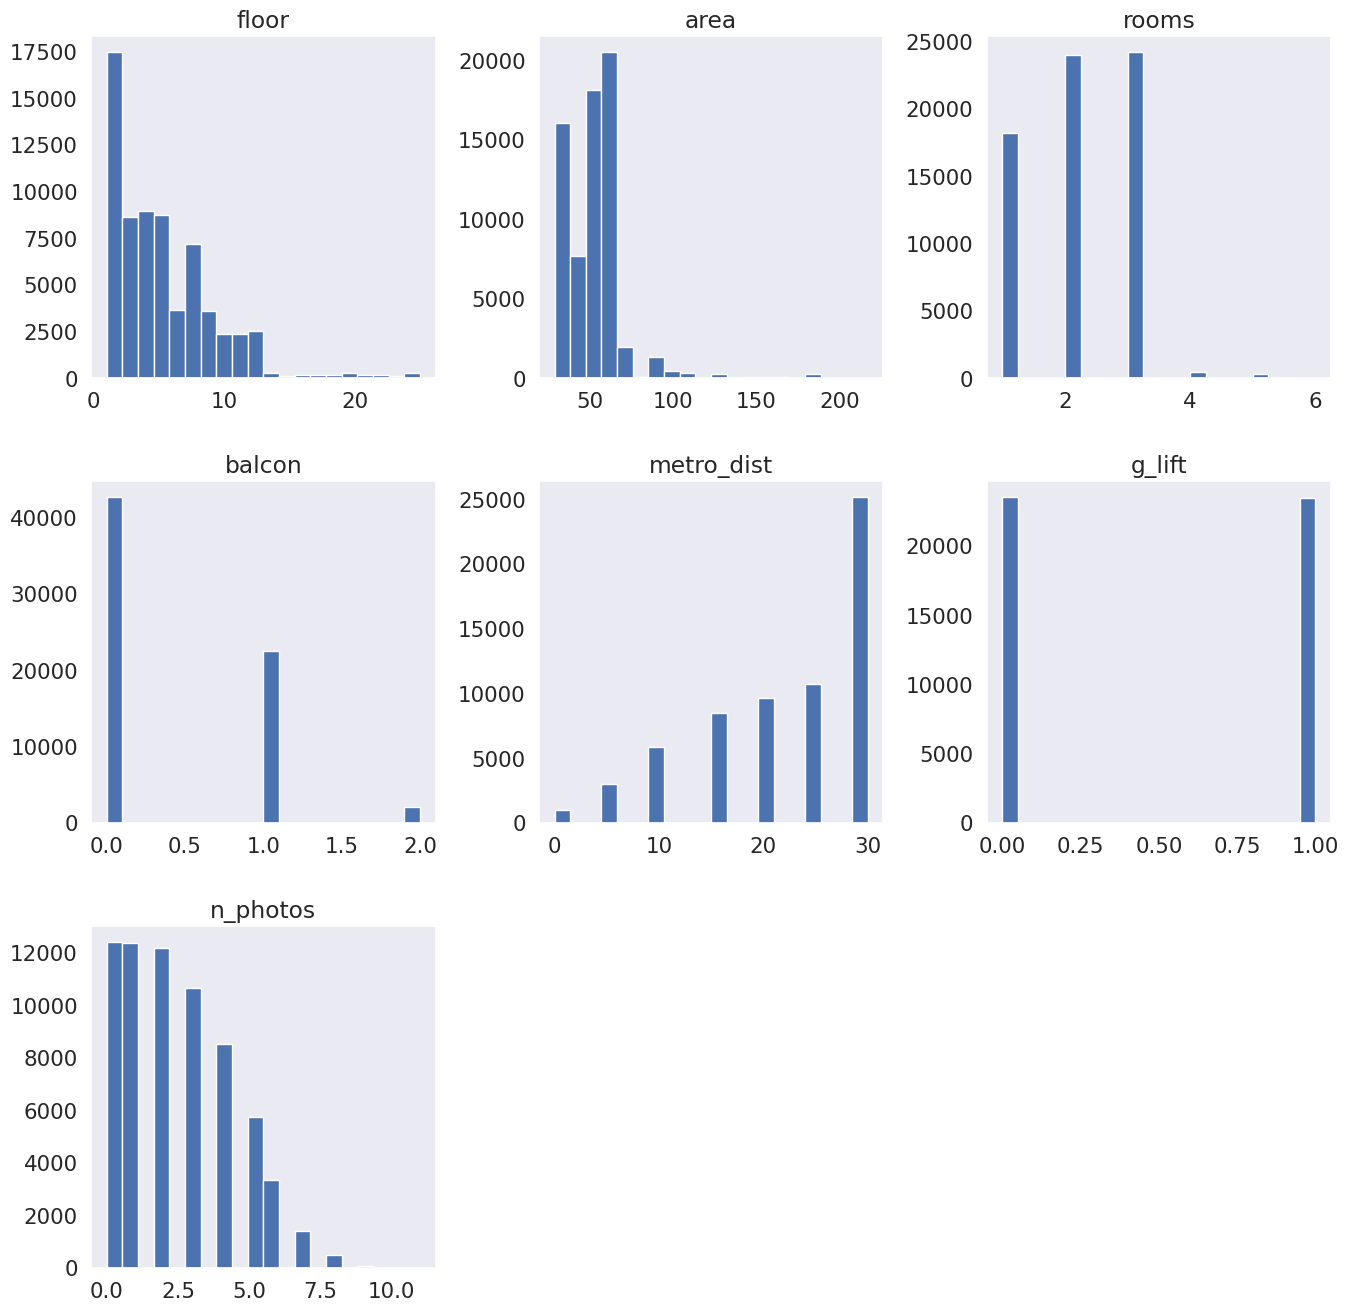

In [ ]:
df_num_features = df.iloc[:,4:11]
df_num_features.hist(figsize=(16, 16), bins=20, grid=False)

более подробно смотрим на floor

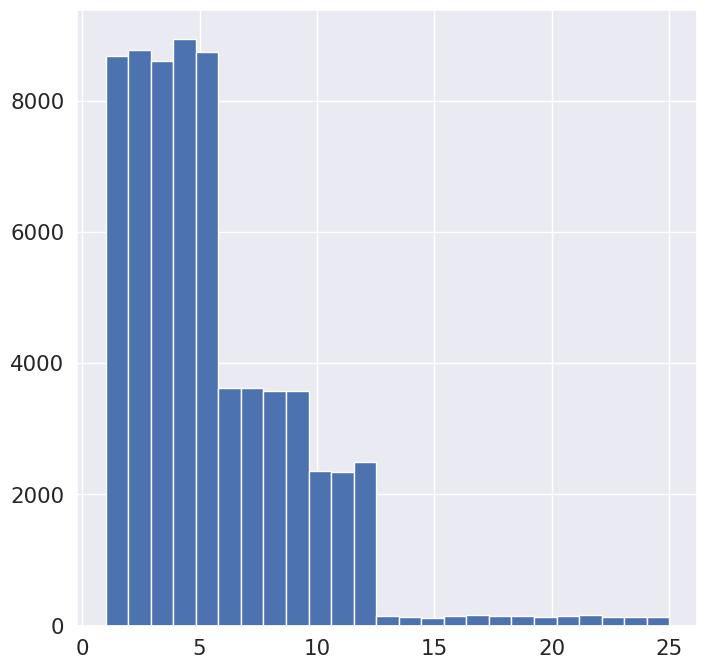

In [ ]:
plt.figure(figsize=(8, 8))
plt.hist(df['floor'], bins = 25)
plt.show()

В признаках выбросов не наблюдается

строим матрицу корреляции

<ipython-input-59-0e9a43aed0b6>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


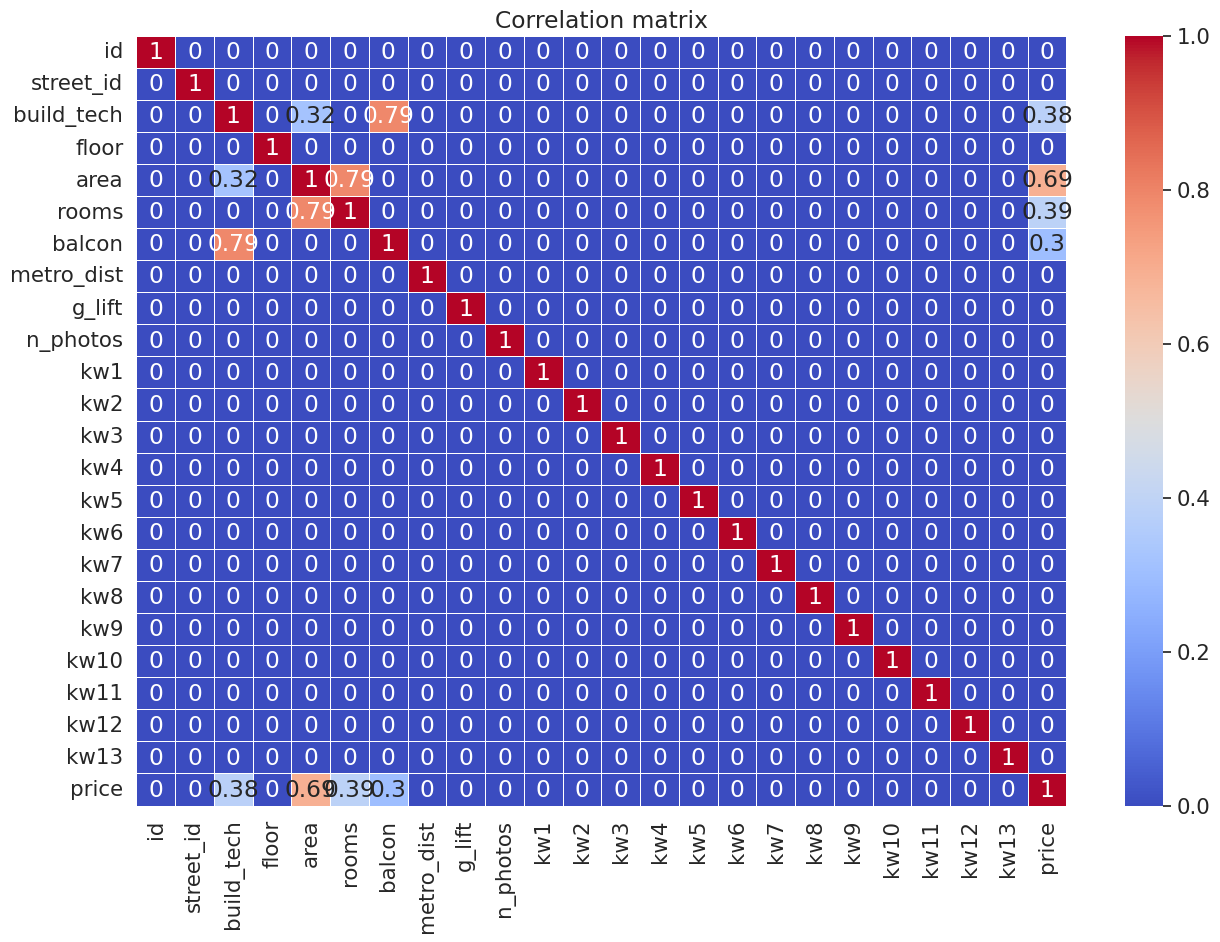

In [ ]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Признак build_tech исключим, т.к. он сильно коррелирует с balcon и имеет много пропусков.

In [ ]:
df = df.drop(['build_tech'], axis = 1)

Пропуски в признаке metro_dist заменим на среднее значение

In [ ]:
df.loc[df['metro_dist'].isnull(), 'metro_dist'] = df['metro_dist'].mean()

In [ ]:
df['g_lift'].unique()

array([ 1., nan,  0.])

Пропуски в признаке g_lift заменим на -1 ("не определено")

In [ ]:
df.loc[df['g_lift'].isnull(), 'g_lift'] = 'NaN'
df.loc[df['g_lift'] == 1, 'g_lift'] = 'Yes'
df.loc[df['g_lift'] == 0, 'g_lift'] = 'No'

Признак street_id сократим до 20 показателей благоприятности районов, объединив улицы по средней цене за квадратный метр

In [ ]:
df['m'] = df['price'] / df['area'] #создаем новый признак цены за квадратный метр

streets = pd.DataFrame(columns = ['street_id', 'mean']) #создаем новый датафрейм с колонками street_id и mean

#добавляем объекты в streets
for id in df['street_id'].unique():
  ob = {'street_id': id, 'mean': df.loc[df['street_id'] == id, 'm'].mean()} #создаем объект с номером улицы и средней ценой за кв.м. на этой улице
  streets = streets.append(ob, ignore_index=True)

streets = streets.sort_values(by = 'mean') #сортируем по средней цене за квадратный метр

#группируем улицы на 20 групп по средней цене за кв.м.
n = streets.shape[0]//20 #считаем сколько в группе улиц
streets['district_id'] = 0 #создаем признак районов(групп)

#присваиваем каждой улице номер района
for i in range(1, 20):
  streets.iloc[n*i - n : n*i, [2]] = i

streets.iloc[n*20-n:, [2]] = 20
streets.reset_index(drop= True , inplace= True )

#записываем в основной датафрейм новый признак
df['district_id'] = 0
df['district_id'] = df['street_id'].apply(lambda x: 'd' + str(np.array(streets.loc[streets['street_id'] == x, 'district_id'])[0]))

df = df.drop(['street_id', 'm'], axis = 1) #удаляем старые признаки

<ipython-input-64-7a4b1565d3fa>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  streets = streets.append(ob, ignore_index=True)
<ipython-input-64-7a4b1565d3fa>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  streets = streets.append(ob, ignore_index=True)
<ipython-input-64-7a4b1565d3fa>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  streets = streets.append(ob, ignore_index=True)
<ipython-input-64-7a4b1565d3fa>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  streets = streets.append(ob, ignore_index=True)
<ipython-input-64-7a4b1565d3fa>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

Через OneHotEncoder преобразуем категориальные признаки

Данный тип кодирования, основывается на создании бинарных признаков, которые показывают принадлежность к уникальному значению.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from functools import reduce

category_names = ['date', 'balcon', 'g_lift', 'district_id'] #записываем категориальные признаки

onehotencoder = OneHotEncoder() #создаем OneHotEncoder
feature_array = onehotencoder.fit_transform(df[category_names]).toarray() # обучаем OneHotEncoder и сохраняем призанки

feature_labels = reduce(lambda x, y: list(x) + list(y), onehotencoder.categories_) #записываем названия новых признаков

df[feature_labels] = feature_array # добвляем новые признаки в датафрейм
df = df.drop(category_names, axis = 1) #удаляем старые признаки
df = df.drop('id', axis = 1) #удаляем ненужный признак

Масштабирование данных

(Выравнивание диапазона изменения каждого признака)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2) #разбиваем данные на тренировочные и тестовые

y_test_copy = y_test.copy()

# стандартизируем данные
mean_x = X_train.mean(axis=0)
std_x = X_train.std(axis=0)

X_train -= mean_x
X_train /= std_x

X_test -= mean_x
X_test /= std_x

mean_y = y_train.mean()
std_y = y_train.std()

y_train -= mean_y
y_train /= std_y

y_test -= mean_y
y_test /= std_y

Обучение сети

In [ ]:
X_train.shape[1]

62

In [ ]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(units = 24, activation='relu', input_shape = (X_train.shape[1], ))) #relu - активационная функция
network.add(layers.Dense(units = 12, activation='relu'))
network.add(layers.Dense(units = 1)) #в задаче регрессии 1 выходной слой, функция активации не используется

network.compile(loss = 'mse', optimizer='adam', metrics = 'mse') #в задаче регрессии функция потерь - mse, optimizer='adam' (из документации Keras), metrics = 'mse'

Dense реализует операцию: output = activation(dot(input, kernel) + bias), где activation — это функция активации по элементам, переданная в качестве аргумента активации, kernel — это матрица весов, созданная слоем, а bias — это вектор смещения, созданный слоем (применимо только в случае, если use_bias = True).


keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer=’glorot_uniform’, bias_initializer=’zeros’, kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)



units: положительное целое число, размерность выходного пространства

activation: используемая функция активации. Если ничего не указывать, активация не применяется (т.е. «линейная» активация: a(x) = x)

use_bias: Boolean, использует ли слой вектор bias

kernel_initializer: Инициализатор для матрицы весов kernel

bias_initializer: Инициализатор для вектора смещения

kernel_regularizer: Функция регулялизатора, применяемая к матрице
весов kernel

bias_regularizer: Функция регуляризатора применяется к вектору bias

activity_regularized: Функция регулялизатора применяется к выходу слоя (его «активация»)

kernel_constraint: Функция ограничения, применяемая к матрице весов kernel

bias_constraint: Функция ограничения, применяемая к вектору bias



Если описывается входной слой, то

input_shape: кортеж из положительных целых чисел, размерность признакового пространства


Почему ReLU?

Нейронные сети способны приблизить сколь угодно сложную функцию, если в них достаточно слоёв и функция активации является нелинейной ( сигмоидой - если вспомнить теорему Хехт-Нильсена или Цибенко).

Функции активации вроде сигмоидной или тангенциальной являются нелинейными, но приводят к проблемам с затуханием (когда производная слишком мала) или увеличением (когда значения производной наоборот велики) градиентов.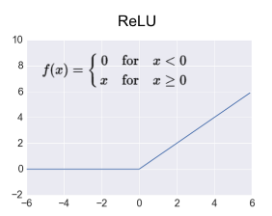


Adam optimization — метод стохастического градиентного спуска, основанный на адаптивной оценке моментов первого и второго порядка.

In [ ]:
num_epoch = 12
history = network.fit(X_train, y_train, epochs=num_epoch, validation_data = (X_test, y_test))

Epoch 1/12
1681/1681 [==============================] - 6s 3ms/step - loss: 0.3101 - mse: 0.3101 - val_loss: 0.1305 - val_mse: 0.1305
Epoch 2/12
1681/1681 [==============================] - 4s 2ms/step - loss: 0.1137 - mse: 0.1137 - val_loss: 0.0886 - val_mse: 0.0886
Epoch 3/12
1681/1681 [==============================] - 4s 2ms/step - loss: 0.0901 - mse: 0.0901 - val_loss: 0.0828 - val_mse: 0.0828
Epoch 4/12
1681/1681 [==============================] - 5s 3ms/step - loss: 0.0865 - mse: 0.0865 - val_loss: 0.0757 - val_mse: 0.0757
Epoch 5/12
1681/1681 [==============================] - 4s 3ms/step - loss: 0.0833 - mse: 0.0833 - val_loss: 0.0750 - val_mse: 0.0750
Epoch 6/12
1681/1681 [==============================] - 4s 2ms/step - loss: 0.0824 - mse: 0.0824 - val_loss: 0.0748 - val_mse: 0.0748
Epoch 7/12
1681/1681 [==============================] - 4s 2ms/step - loss: 0.0807 - mse: 0.0807 - val_loss: 0.0743 - val_mse: 0.0743
Epoch 8/12
1681/1681 [==============================] - 5s 3ms

421/421 [==============================] - 1s 2ms/step - loss: 0.0724 - mse: 0.0724


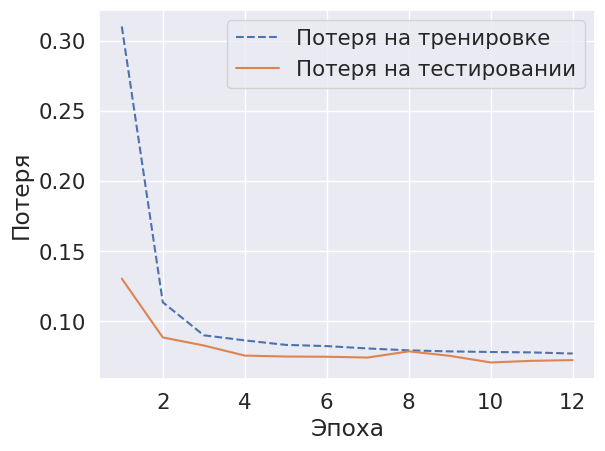

In [ ]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']
training_mse = network.evaluate(X_train, y_train)[1]  #
test_mse = network.evaluate(X_test, y_test)[1]  #

epoch_count = range(1, len(training_loss) + 1)
plt.rc('font', family='Verdana', size=16)
plt.plot(epoch_count, training_loss, label = 'Потеря на тренировке', ls = '--')
plt.plot(epoch_count, test_loss, label = 'Потеря на тестировании')
plt.legend()
plt.xlabel('Эпоха')
plt.ylabel('Потеря')
plt.show()

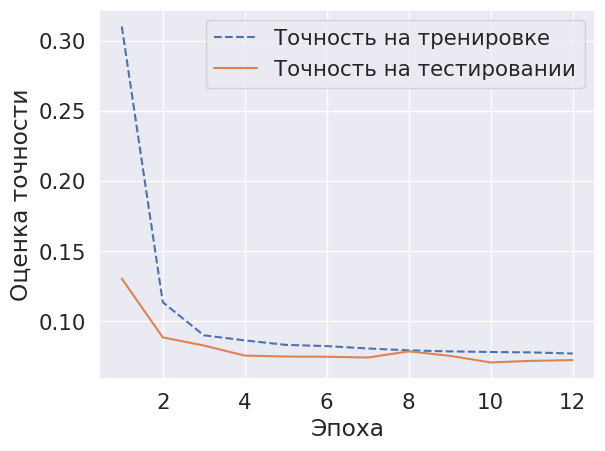

In [ ]:
training_acc = history.history['mse']
test_acc = history.history['val_mse']

plt.rc('font', family='Verdana', size=16)
plt.plot(epoch_count, training_acc, label = 'Точность на тренировке', ls = '--')
plt.plot(epoch_count, test_acc, label = 'Точность на тестировании')
plt.legend()
plt.xlabel('Эпоха')
plt.ylabel('Оценка точности')
plt.show()

In [ ]:
print("MSE на тренировочных данных:", training_mse)
print("MSE на тестовых данных:", test_mse)

MSE на тренировочных данных: 0.07337775081396103
MSE на тестовых данных: 0.07244633883237839
